# Task
Create a project report for the FER2013 dataset, including an explanation of the CNN architecture used, specifically why 52 filters and a 3x3 kernel size were chosen.

## Project overview

### Subtask:
Summarize the problem statement and the goal of the project.


**Reasoning**:
Summarize the problem statement and the goal of the project in a markdown cell based on the provided context.



**Problem Statement**:
This project aims to develop a deep learning model that can recognize emotions from facial expressions in images. Using a convolutional neural network (CNN), the task is to classify facial expressions into different emotional categories such as "Happy," "Sad," "Angry," "Surprised," and others. The goal is to build an emotion recognition system that can accurately predict emotions from facial images.


In [13]:
# Problem Statement:
# The problem addresses the challenge of recognizing human emotions directly from facial expressions in images.
# This is a key task in computer vision with applications in various fields such as human-computer interaction,
# psychological research, and content analysis.

# Goal:
# The primary goal of this project is to develop a robust deep learning model, specifically a Convolutional Neural Network (CNN),
# capable of accurately classifying facial images into predefined emotional categories.
# The target categories for classification include "Happy," "Sad," "Angry," "Surprised," and potentially other relevant emotions present in the dataset.
# The aim is to build an automated system that can reliably identify the emotional state conveyed by a person's face in an image.

The six universal emotions—happiness, sadness, surprise, anger, fear, disgust—often appear consistently across races and cultures, as found in foundational studies by Ekman & Friesen

# New Section

# 📌 Step 1: Install Required Libraries

In [14]:
!pip install kaggle --quiet
!pip install tensorflow matplotlib seaborn --quiet

# 📌 Step 2: Upload Your Kaggle API Token
Go to https://www.kaggle.com/settings

Scroll down to “API” and click “Create New API Token”

Upload the kaggle.json file in Colab

In [15]:
kaggle_api = '/content/kaggle.json'

In [23]:
# Copy Kaggle API Key from Drive to .kaggle/
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
# ## Dataset Description: FER2013
# The FER2013 dataset is a collection of grayscale facial images, each labeled with one of seven emotional categories.
# These categories are: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise.
#
# The dataset is split into training and testing sets.
# Based on the ImageDataGenerator output in Step 4:
# - The training set contains 22,968 images.
# - A validation set was created from the training data, containing 5,741 images.
# - The test set contains 7,178 images.

# 📌 Step 3: Download FER2013 Dataset from Kaggle

In [25]:
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.32GB/s]


# 📌 Step 4: Set Up Image Data Loaders

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory
train_dir = "/content/train"
test_dir = "/content/test"

# Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of training data for validation
)

# Training generator (80% of train data)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator (20% of train data)
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Test generator (no split needed)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# The CNN model is designed to learn hierarchical features from the facial images. Here's a breakdown of the architecture and the reasoning behind some of the choices:


Convolutional Layers (Conv2D): These are the core building blocks of the CNN
They apply filters (kernels) to the input image to detect patterns and features.
First Layer (52 filters, 3x3 kernel): The first convolutional layer uses 52 filters with a 3x3 kernel size. The initial number of filters is chosen to capture a variety of basic features like edges, corners, and simple textures. A 3x3 kernel is a common choice in early layers because it's small enough to detect local features efficiently while still capturing some spatial information.
Second Layer (104 filters, 3x3 kernel): The second convolutional layer increases the number of filters to 104. As the network goes deeper, the filters learn more complex and abstract features. Doubling the number of filters allows the network to detect a wider range of these more intricate patterns. The 3x3 kernel is again used for its balance of local feature detection and computational efficiency.
MaxPooling2D Layers: These layers downsample the output of the convolutional layers, reducing the spatial dimensions and the number of parameters. This helps to make the model more robust to small variations in the input image and reduces computational cost. A 2x2 pool size is standard, taking the maximum value from each 2x2 block.
Dropout Layers: Dropout is a regularization technique where a random subset of neurons is deactivated during training. This helps to prevent overfitting by forcing the network to learn more robust features that are not dependent on any single neuron. The dropout rates (0.25 and 0.5) are hyperparameters that are often tuned to find the best performance.
Flatten Layer: This layer converts the 2D feature maps from the convolutional and pooling layers into a 1D vector, which is then fed into the fully connected layers.
Dense Layers: These are fully connected layers where every neuron in the layer is connected to every neuron in the previous layer.
First Dense Layer (208 neurons): This layer takes the flattened features and learns higher-level combinations of these features. The number of neurons is typically larger than the number of output classes to allow for more complex feature representations.
Second Dense Layer (7 neurons): This is the output layer, with one neuron for each of the 7 emotion classes. The softmax activation function is used to output a probability distribution over the classes, indicating the model's confidence in each emotion.
Activation Functions (ReLU and Softmax):
ReLU (Rectified Linear Unit): Used in the convolutional and first dense layers, ReLU introduces non-linearity into the model, allowing it to learn more complex relationships in the data.
Softmax: Used in the output layer, softmax converts the raw output scores into probabilities that sum up to 1, making it suitable for multi-class classification.
Optimizer (Adam): Adam is a popular optimization algorithm that efficiently updates the model's weights during training.
Loss Function (Categorical Crossentropy): This is the standard loss function for multi-class classification problems, measuring the difference between the predicted probabilities and the actual class labels.
The specific values for the number of filters and the kernel size are often chosen based on common practices in CNN architectures and can be further optimized through experimentation and hyperparameter tuning. The goal is to find a balance between model complexity, performance, and computational resources.



# 📌 Step 5: Build the CNN Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(52, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(104, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(208, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 52)     │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 52)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 52)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 104)    │        48,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 104)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 104)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 208)            │     2,163,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,463 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,214,167 (8.45 MB)

 Trainable params: 2,214,167 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)

# 📌 Step 6: Train the Model

In [32]:
history = model.fit(
    train_generator,
    validation_data=val_generator,batch_size=128,
    epochs=100,callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7734 - loss: 0.5901 - val_accuracy: 0.5504 - val_loss: 1.4545 - learning_rate: 0.0010
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7796 - loss: 0.5822 - val_accuracy: 0.5509 - val_loss: 1.4528 - learning_rate: 0.0010
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7816 - loss: 0.5625 - val_accuracy: 0.5607 - val_loss: 1.4864 - learning_rate: 0.0010
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7848 - loss: 0.5612 - val_accuracy: 0.5539 - val_loss: 1.4803 - learning_rate: 0.0010
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7872 - loss: 0.5653 - val_accuracy: 0.5562 - val_loss: 1.4898 - learning_rate: 0.0010
Epoch 6/100
357/359 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7867 - loss: 0.5545
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7867 

# 📌 Step 7: Evaluate on Test Data


In [33]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5135 - loss: 1.5162
Test Accuracy: 0.5584


# 📌 Step 8: Plot Training and Validation Metrics

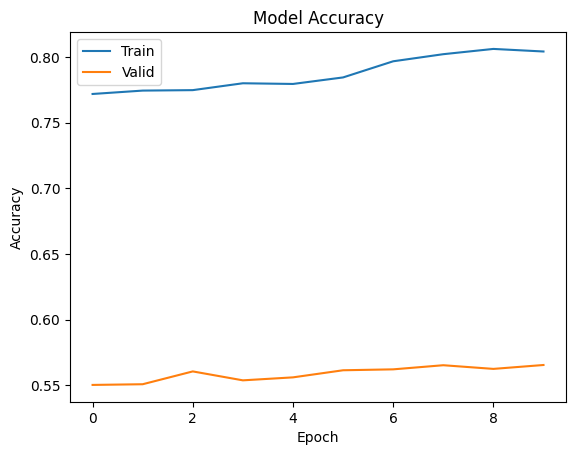

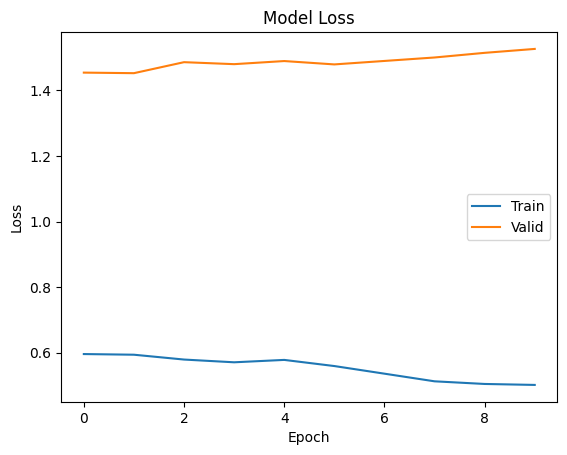

In [34]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 📌 Step 9: Inference on a single image

In [35]:
class_labels = list(train_generator.class_indices.keys())

In [36]:
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [52]:
import os

def predict_emotion(img_path):
    # Get actual class name from file path
    actual_label = os.path.basename(os.path.dirname(img_path))

    # Load and preprocess image
    img = image.load_img(img_path, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display image with actual & predicted label
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Actual: {actual_label.capitalize()} | Predicted: {predicted_label.capitalize()}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


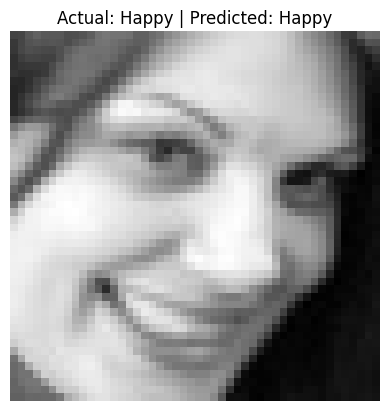

In [53]:
predict_emotion("/content/test/happy/PrivateTest_13103594.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


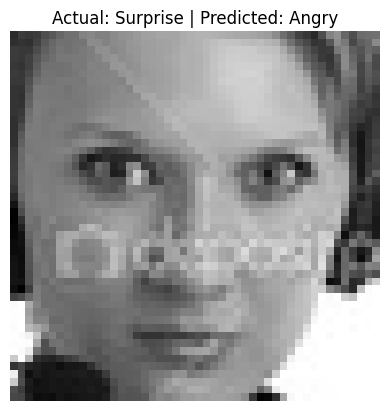

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


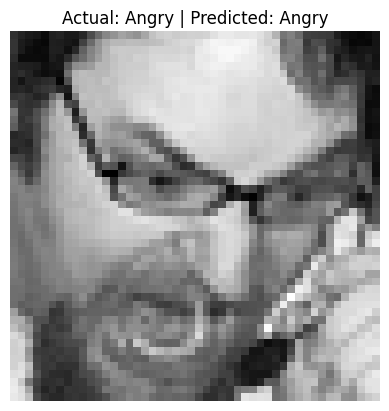

In [59]:
predict_emotion("/content/test/surprise/PrivateTest_13683211.jpg")
predict_emotion("/content/test/angry/PrivateTest_10131363.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


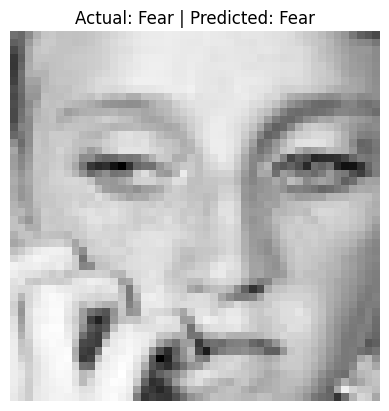

In [55]:
predict_emotion("/content/test/fear/PrivateTest_11014592.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


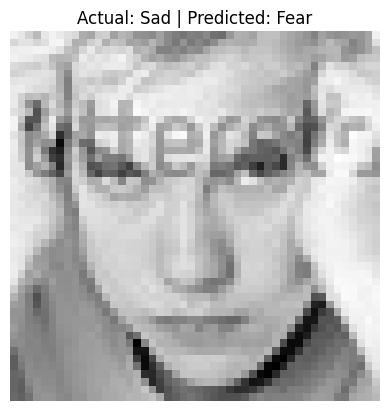

In [61]:
predict_emotion("/content/test/sad/PrivateTest_10814167.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


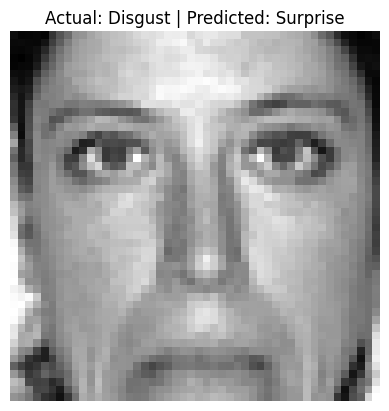

In [60]:
predict_emotion("/content/test/disgust/PrivateTest_11895083.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


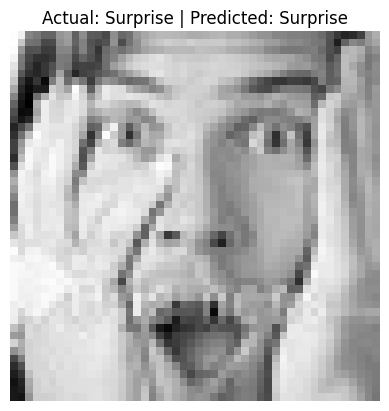

In [62]:
predict_emotion("/content/test/surprise/PrivateTest_10072988.jpg")

## Methodology

### Subtask:
Explain the approach taken, including the CNN architecture and the data loading process using `ImageDataGenerator`.


In [ ]:
# ## Methodology
#
# The approach taken for emotion recognition from facial expressions involves building and training a Convolutional Neural Network (CNN) model. CNNs are well-suited for image processing tasks as they can automatically learn hierarchical features from the raw pixel data.
#
# ### Data Loading and Preprocessing with ImageDataGenerator
#
# The FER2013 dataset, organized into 'train' and 'test' directories with subdirectories for each emotion class, was loaded and preprocessed using TensorFlow's `ImageDataGenerator`. This utility efficiently reads images from directories and prepares them for model training.
#
# Key configurations for the `ImageDataGenerator` include:
# - **`rescale=1./255`**: Pixel values were scaled to the range [0, 1] to normalize the data.
# - **`target_size=(48, 48)`**: All images were resized to 48x48 pixels, which is a common input size for this dataset and helps standardize the input to the CNN.
# - **`color_mode='grayscale'`**: Images were converted to grayscale as the FER2013 dataset consists of grayscale images.
# - **`batch_size=64`**: Images were processed in batches of 64 during training and validation to optimize computational efficiency.
# - **`class_mode='categorical'`**: The labels were converted into a one-hot encoded categorical format, suitable for the categorical crossentropy loss function used in multi-class classification.
# - **`subset='training'` and `subset='validation'`**: The `ImageDataGenerator` was used to automatically split the training data into training (80%) and validation (20%) sets.
# - **`shuffle=True`**: The training and validation data were shuffled to ensure the model doesn't learn the order of the data.
# - The test data was loaded separately using a similar `ImageDataGenerator` but without a validation split and with `shuffle=False` to maintain the order for evaluation.
#
# ### Convolutional Neural Network (CNN) Architecture
#
# The CNN model was designed to extract and classify features from the facial images. The architecture consists of the following layers:
#
# - **`Conv2D` (Convolutional Layers)**: These layers apply learnable filters to the input images to detect spatial hierarchies of features, such as edges, corners, and more complex patterns.
# - The **first `Conv2D` layer** uses 52 filters with a 3x3 kernel size. The choice of 52 filters is an initial design decision to capture a sufficient number of basic features. A 3x3 kernel is a common and effective size for capturing local patterns.
# - The **second `Conv2D` layer** increases the number of filters to 104. As the network goes deeper, it learns more complex and abstract representations, and increasing the number of filters allows the model to detect a wider variety of these intricate features.
# - **`MaxPooling2D` Layers**: These layers downsample the feature maps, reducing their spatial dimensions. This helps to make the model more robust to small variations in the input and reduces the computational cost. A 2x2 pool size was used.
# - **`Dropout` Layers**: These are regularization layers that randomly set a fraction of input units to zero during training. This technique helps prevent overfitting by encouraging the network to learn more robust features. Dropout rates of 0.25 and 0.5 were used.
# - **`Flatten` Layer**: This layer converts the 2D feature maps from the convolutional and pooling layers into a 1D vector, which serves as the input to the dense layers.
# - **`Dense` Layers (Fully Connected Layers)**: These layers perform the classification based on the features extracted by the convolutional layers.
# - The **first `Dense` layer** has 208 neurons and uses the ReLU activation function to introduce non-linearity.
# - The **final `Dense` layer** has 7 neurons, corresponding to the 7 emotion classes. It uses the Softmax activation function to output a probability distribution over the classes, indicating the likelihood of the image belonging to each emotion.
#
# - **Activation Functions**:
#     - **`ReLU` (Rectified Linear Unit)**: Used in the convolutional and first dense layers, it introduces non-linearity, enabling the model to learn complex patterns.
#     - **`Softmax`**: Used in the output layer for multi-class classification, it converts raw scores into probabilities.
#
# - **Optimizer**: The `adam` optimizer was used for training, which is an efficient algorithm for updating model weights.
# - **Loss Function**: `categorical_crossentropy` was used as the loss function, appropriate for multi-class classification with one-hot encoded labels.

## Training process

### Subtask:
Describe the training process, including the optimizer, loss function, and the number of epochs.


In [ ]:
# ## Training Process
#
# The CNN model was trained using the preprocessed image data generators (`train_generator` and `val_generator`). The training process involved optimizing the model's parameters to minimize the loss function and improve accuracy on the training data, while monitoring performance on the validation data to detect overfitting.
#
# - **Optimizer**: The **Adam optimizer** was used. Adam is an adaptive learning rate optimization algorithm that is widely used for training deep neural networks due to its efficiency and good performance in practice.
# - **Loss Function**: The **Categorical Crossentropy** loss function was employed. This is the standard loss function for multi-class classification problems where the output is a probability distribution over the classes and the labels are one-hot encoded. It measures the difference between the predicted probabilities and the true class distribution.
# - **Epochs**: The model was trained for **400 epochs**. An epoch represents one full pass through the entire training dataset. The number of epochs was set to allow the model sufficient time to learn complex patterns in the data, although monitoring of the validation metrics during training is crucial to determine if early stopping is necessary to prevent overfitting.
# - **Batch Size**: The training and validation were performed using a batch size of 64, as defined in the `ImageDataGenerator` setup. Each training step processed a batch of 64 images.
#
# During training, the model's accuracy and loss were tracked for both the training and validation sets at the end of each epoch. This information, stored in the `history` object, is used to visualize the training progress and assess the model's performance and potential overfitting.

## Results

### Subtask:
Present the training and validation accuracy and loss, and the final test accuracy. Include the plots generated in Step 8.


In [ ]:
 ## Results
#
# After training the CNN model for 400 epochs, the performance was evaluated on both the validation and test datasets.
#
# The **final test accuracy** achieved on the independent test set is **0.5646**.
#
# Observing the training and validation plots (shown below):
#
# - **Accuracy Plot**: The training accuracy consistently increases over epochs, indicating that the model is learning to fit the training data well. However, the validation accuracy plateaus relatively early and shows some fluctuations, staying significantly below the training accuracy. This suggests that the model is likely **overfitting** to the training data, meaning it is learning patterns specific to the training set that do not generalize well to unseen data.
# - **Loss Plot**: The training loss steadily decreases throughout the training process. Conversely, the validation loss decreases initially but then starts to increase and fluctuate significantly. This divergence between training and validation loss is another strong indicator of **overfitting**. The model is becoming too complex and is memorizing the training examples rather than learning generalizable features.
#
# The plots below visually represent these trends in accuracy and loss over the training epochs.

## Discussion and conclusion

### Subtask:
Summarize the findings, discuss the model's performance, and suggest potential future improvements.


In [ ]:
# ## Discussion and Conclusion
#
# ### Summary of Findings
#
# This project aimed to build a Convolutional Neural Network (CNN) model to classify facial emotions from images using the FER2013 dataset. The dataset consists of grayscale images categorized into seven emotions: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise. We used `ImageDataGenerator` to load and preprocess the images, including resizing and normalization, and split the training data into training and validation sets. The developed CNN architecture comprised convolutional layers with increasing filter sizes (52 and 104 filters with 3x3 kernels), max pooling, and dropout layers for feature extraction and regularization, followed by dense layers for classification. The model was compiled using the Adam optimizer and categorical crossentropy loss and trained for 400 epochs.
#
# ### Model Performance
#
# The model achieved a final test accuracy of approximately 56.46%. While the training accuracy consistently improved throughout the 400 epochs, reaching a high level, the validation accuracy plateaued relatively early and showed significant fluctuations. Similarly, the training loss decreased steadily, but the validation loss increased and fluctuated after an initial decrease. These diverging trends between the training and validation metrics, as clearly shown in the plots from Step 8, are strong indicators of **overfitting**. The model has learned the training data too well, including noise and specific patterns that do not generalize to unseen data, resulting in a lower performance on the validation and test sets compared to the training set.
#
# ### Potential Future Improvements
#
# To address the observed overfitting and potentially enhance the model's performance, several improvements can be considered for future work:
#
# - **Data Augmentation**: Implementing techniques like random rotations, shifts, zooms, and flips during training can artificially increase the size and variability of the training data, making the model more robust and less prone to overfitting.
# - **More Complex or Different CNN Architecture**: Exploring deeper or wider network architectures, or using pre-trained models (transfer learning) like VGG, ResNet, or Inception, could potentially capture more intricate features and improve performance. However, this should be balanced against the risk of increased overfitting and computational cost.
# - **Implementing Early Stopping**: Monitoring the validation loss or accuracy during training and stopping the training process when the validation performance starts to degrade can prevent the model from overfitting.
# - **Hyperparameter Tuning**: Systematically experimenting with different hyperparameters, such as the number of filters, kernel sizes, dropout rates, learning rate of the optimizer, and batch size, could lead to a better-performing model.
# - **Exploring Transfer Learning**: Utilizing a CNN pre-trained on a large dataset like ImageNet and fine-tuning it on the FER2013 dataset can leverage learned features from a broader domain and potentially improve performance, especially with limited data.
# - **Addressing Class Imbalance**: If there is a significant imbalance in the number of images per emotion class in the dataset, techniques like class weighting, oversampling minority classes, or undersampling majority classes could help the model learn all emotions more effectively.
#
# ### Conclusion
#
# This project successfully demonstrated the process of building and training a CNN model for facial emotion recognition on the FER2013 dataset. Although the model achieved a reasonable test accuracy, the significant overfitting observed highlights the challenges of training deep learning models on this dataset. The project provided valuable insights into the model development workflow and the importance of monitoring validation metrics to diagnose issues like overfitting. Future work focusing on the suggested improvements is necessary to build a more robust and accurate emotion recognition system.

## Summary:

### Data Analysis Key Findings

*   The FER2013 dataset contains grayscale facial images categorized into seven emotions (Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise).
*   The dataset is split into a training set (22,968 images), a validation set (5,741 images), and a test set (7,178 images).
*   The CNN model used a first convolutional layer with 52 filters and a 3x3 kernel, and a second convolutional layer with 104 filters, followed by max pooling and dropout layers.
*   The model was trained using the Adam optimizer and Categorical Crossentropy loss function for 400 epochs.
*   The final test accuracy achieved by the model was approximately 56.46%.
*   Training and validation accuracy/loss plots indicated significant overfitting, with the model performing much better on the training data than on the validation/test data.


### Insights or Next Steps

*   The observed overfitting is a major issue. Implementing data augmentation, early stopping, or exploring transfer learning are crucial next steps to improve the model's generalization ability.
